In [2]:
import os, sys, inspect

cmd_folder = os.path.realpath(os.path.abspath(os.path.split(inspect.getfile( inspect.currentframe() ))[0]))
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)


cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"lib/Leap")))
if cmd_subfolder not in sys.path:
    sys.path.insert(0, cmd_subfolder)
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"lib/Anderson")))
if cmd_subfolder not in sys.path:
    sys.path.insert(0, cmd_subfolder)

In [3]:
import pandas as pd
import numpy as np
import neuralnetworks as nn
import mlutils as ml

In [4]:
def trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify=False):
    import neuralnetworks as nn
    import mlutils as ml
    import numpy as np
    import time
    result = []
    for structure in hiddenLayerStructures:
        trainedResult = []
        testResult = []
        t0 = time.time()
        for n in range(0, numberRepetitions):
            Xtrain,Ttrain,Xtest,Ttest = ml.partition(X,T,(trainFraction, 1-trainFraction),classify)
            if classify:
                nnet = nn.NeuralNetworkClassifier(X.shape[1], structure, len(np.unique(T)))
                nnet.train(Xtrain, Ttrain, numberIterations, errorPrecision=1.e-8)
                trainedResult.append(np.sum(nnet.use(Xtrain)==Ttrain)/len(Ttrain))
                testResult.append(np.sum(nnet.use(Xtest)==Ttest)/len(Ttest))
            else:
                nnet = nn.NeuralNetwork(X.shape[1], structure, T.shape[1])
                nnet.train(Xtrain, Ttrain, numberIterations)
                trainedResult.append(np.sqrt(np.mean(((nnet.use(Xtrain)-Ttrain)**2))))
                testResult.append(np.sqrt(np.mean(((nnet.use(Xtest)-Ttest)**2))))

            
        result.append([structure, trainedResult, testResult, time.time() - t0])
    return result

def summarize(results):
    import numpy as np
    summaryResults = []
    for result in results:
        summaryResults.append([result[0], np.mean(result[1]), np.mean(result[2]), result[3]])
    return summaryResults


def bestNetwork(summary):
    best = min(summary, key=lambda l: l[2])
    return best


Dependencies/import config

## Get Data

In [5]:
data = pd.read_csv("templates/data1Normed.csv")
names = list(data)
data["signcode"] = data["sign"].astype('category').cat.codes
data = data.values

In [6]:
Xhands = data[:, 0:63]
Xhands = Xhands.astype(np.float64)

In [7]:
Tsign = data[:, 64:65]
Tsign = Tsign.astype(np.int32)

In [8]:
Xhands.shape

(5071, 63)

In [9]:
Tsign.shape

(5071, 1)

In [10]:
handNames = names[0:63]
signName = names[63]

In [11]:
for i in range(0, len(np.unique(Tsign).tolist())):
    print('{} samples in class {} sign: {} '.format(np.sum(Tsign==i), i, np.unique(data[:, 63]).tolist()[i]))

206 samples in class 0 sign: a 
228 samples in class 1 sign: b 
158 samples in class 2 sign: c 
178 samples in class 3 sign: d 
155 samples in class 4 sign: e 
190 samples in class 5 sign: f 
175 samples in class 6 sign: g 
181 samples in class 7 sign: h 
199 samples in class 8 sign: i 
227 samples in class 9 sign: j 
166 samples in class 10 sign: k 
219 samples in class 11 sign: l 
146 samples in class 12 sign: m 
197 samples in class 13 sign: n 
222 samples in class 14 sign: o 
189 samples in class 15 sign: p 
218 samples in class 16 sign: q 
209 samples in class 17 sign: r 
170 samples in class 18 sign: s 
186 samples in class 19 sign: t 
175 samples in class 20 sign: u 
190 samples in class 21 sign: v 
173 samples in class 22 sign: w 
210 samples in class 23 sign: x 
273 samples in class 24 sign: y 
231 samples in class 25 sign: z 


Get list of how many samples in each class/category/how many of each sign.

## Test NNet

In [13]:
results = trainNNs(Xhands, Tsign, 0.90, [5, 10, 63, [5,5,5], [5,2,2,5]], 10, 100, classify=True)

In [14]:
results

[[5,
  [0.60727591496822264,
   0.62897216743370588,
   0.58864781941705013,
   0.61297392066622836,
   0.64058733289502523,
   0.5744028051720359,
   0.5818540433925049,
   0.6329169406092483,
   0.56914310760464604,
   0.60924830155599385],
  [0.58464566929133854,
   0.60433070866141736,
   0.55708661417322836,
   0.62204724409448819,
   0.63385826771653542,
   0.56889763779527558,
   0.55708661417322836,
   0.59645669291338588,
   0.55905511811023623,
   0.58267716535433067],
  30.652753829956055],
 [10,
  [0.74337058952443569,
   0.76090291474906857,
   0.76353276353276356,
   0.76287530133683978,
   0.76221783914091601,
   0.75126013587552054,
   0.72824895901818976,
   0.75980714442252906,
   0.75827306596537369,
   0.76243699320622393],
  [0.72834645669291342,
   0.74212598425196852,
   0.74409448818897639,
   0.73622047244094491,
   0.73622047244094491,
   0.72047244094488194,
   0.72244094488188981,
   0.73818897637795278,
   0.70866141732283461,
   0.73622047244094491],
  35.

In [15]:
summarize(results)

[[5, 0.60460223537146596, 0.58661417322834652, 30.652753829956055],
 [10, 0.75529257067718603, 0.73129921259842523, 35.3932363986969],
 [63, 0.92798597413982031, 0.84763779527559058, 80.89939761161804],
 [[5, 5, 5], 0.43653298268682883, 0.42618110236220474, 33.17554569244385],
 [[5, 2, 2, 5], 0.25901818978742053, 0.25354330708661416, 32.41000270843506]]

In [16]:
bestNet = bestNetwork(summarize(results))
bestNet

[[5, 2, 2, 5], 0.25901818978742053, 0.25354330708661416, 32.41000270843506]

## Plot the test

In [77]:
bestNet = [252]

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

#run best on 
Xtrain,Ttrain,Xtest,Ttest = ml.partition(Xhands,Tsign,(0.8, 0.2),True)
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], bestNet, len(np.unique(Ttrain)))
nnet.train(Xtrain, Ttrain, 200)

NeuralNetwork(63, [252], 26)
   Network was trained for 200 iterations. Final error is 0.0003592975076544833.

In [79]:
result = nnet.use(Xtest)

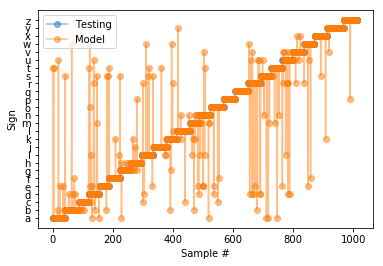

In [80]:
#plt.subplot(3, 1, 1)
plt.plot(Ttest, 'o-', alpha=0.5)
plt.plot(result, "o-", alpha=0.5)

labels = np.unique(data[:, 63])
plt.xlabel("Sample #")
plt.ylabel("Sign")

plt.yticks(np.unique(Ttest).tolist(), np.unique(labels).tolist())

plt.legend(('Testing','Model'), loc='upper left')

vs